[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/Machine-Learning/blob/master/Notebooks/Module_2/Regresion_Lineal_WoAns.ipynb)

# Regresión Lineal con ``Scikit Learn``

<img src="https://docs.google.com/uc?export=download&id=1b2uaZ_Y9TLZhu5YyqgzeZbNBh0-PQrTO" width="600" align="middle">

---

## Contenido de la Sección


1.   Introducción a ``Scikit Learn``
2.   Regresión Lineal
          2.1. Simple y Múltiple.
          2.2. Polinomial (Con Funciones Base)
          2.3. Selección de variables: Correlación y Mapas de Calor
          2.4. Evaluación del Error: R^2 y Error Cuadrático Promedio.

---

# 2.1. Introducción a ``Scikit Learn``

Existen numerosas librerias de Python con implementaciones de algoritmos de ML. Una de las mas conocidas es [Scikit-Learn](http://scikit-learn.org).

<img src="https://docs.google.com/uc?export=download&id=1O1xpHxwRTjKySDgZrf7ReFejJih63YUc" width="400" align="middle">

Este paquete provee diferentes algoritmos de ML con **implementaciones eficientes**. Scikit-Learn se caracteriza por dos cosas:
1. Programación limpia y uniforme de implementar/usar los algoritmos.
2. Buena documentación en linea.

Por *uniforme* se refiere a que **todos los modelos utilizan el mismo proceso de  uso y sintaxis**. De esta forma cambiar entre algoritmos es muy sencillo.

En este submodulo se proporciona una descripción general de la API de ``Scikit-learn``. Es importante recalcar, **los elementos que conforman y la sintaxis de la API**, ya que esto permitirá comprender de manera más profunda el uso de los algoritmos y enfoques de ML en los siguientes modulos.

<img src="https://docs.google.com/uc?export=download&id=1D4d8y7ENGmDwt-rcbs28p1NoQ2LpFSsk" width="800" align="middle">

<!-- [Scikit Learn API Description](https://arxiv.org/pdf/1309.0238.pdf) -->

---
## Representación de Datos

ML crea modelos a partir de datos: por esa razón, comenzaremos recalcando que, es necesario representar los datos para que la computadora los entienda i.e. en términos de **tablas de datos** (``numpy.array`` o ``pandas.DataFrame``). Esta es la misma forma que ``Scikit-Learn`` emplea para representar y alimentar los datos a sus diferentes funciones (i.e. algortimos).

### Datos como Tabla

Una tabla es una cuadrícula de datos bidimensional.
  - **filas** representan **individuos/muestras** del conjunto de datos ($\mathbf{x}_i$).
  - **columnas** variables independientes relacionadas con cada uno de estos elementos ($\mathbf{x}_{:,j}\mid j=\{\text{columnas}\neq\text{clase}\}$).

Por ejemplo, consideramos el famoso conjunto de [flores Iris de Anderson](https://en.wikipedia.org/wiki/Iris_flower_data_set) estudiado por Roland Fisher en 1936. Este también la podemos encontrar en forma de ``DataFrame`` de Pandas dentro de la libreria [seaborn](http://seaborn.pydata.org/):

<img src="https://docs.google.com/uc?export=download&id=1kd71YglY3FAJKBSUnM4ZUCsWuUMkEMLe" width="800" align="middle">

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import data_table

#pyplot graphic style
plt.style.use('fivethirtyeight')

#load from Seaborn library, the iris dataset
iris = sns.load_dataset('iris');
#data_table.DataTable(iris, include_index=True,num_rows_per_page=10)
iris

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Cada fila ``i`` de los datos se refiere a una sola flor observada ($\mathbf{x}_i$), y el número de filas es el número total de flores del conjunto de datos denotada como ``n_samples`` ($i=1,\ldots,n_{samples}$).

Del mismo modo, cada columna de los datos se refiere a una información cuantitativa particular que describe cada muestra. En general, nos referiremos a las columnas de la matriz como *características*, y al número de columnas como ``n_features`` ($j=1,\ldots,n_{features}$).

#### Matríz de Características ($X$)

La **Matríz de Características** es una matriz 2D númerica ($\mathbf{x}_i\in X$).

Por convención se le suele almacenar en la variable ``X``. Por lo tanto, ``X`` tiene la forma (``X.shape``)  ``[n_samples, n_features]``. Esta matriz es un arreglo numérico de NumPy o un ``DataFrame`` de Pandas, aunque algunos modelos de Scikit-Learn también acepta las matrices esparsas de SciPy.

#### Arreglo de la variable dependiente ($Y$)

Además de la matríz de características ``X``, típicamente tenemos un arreglo de *etiquetas*, que por convencionalismo denotamos como ``y``. El arreglo de la variable dependiente es de **1D**, tiene una longitud de ``n_samples``, y se representa en python como un arreglo de NumPy array o un ``Series`` de Pandas.

### Ejemplo

Recordemos los datos de flores del conjunto **iris**. En dicho conjunto lo que se busca es **construir un clasificador** cuya función es **predecir la clase de la flor** (i.e. $y_i$) usando la **longitud y anchura de sus flores y sépalos** (i.e. $\mathbf{x}_i$). De dicho conjunto, la columna ``species`` corresponde a la clase, y el resto exceptuando al índice, a las variables independientes. 

<a href="https://es.wikipedia.org/wiki/S%C3%A9palo">
         <img alt="Qries" src="https://upload.wikimedia.org/wikipedia/commons/c/c5/P%C3%A9talo-s%C3%A9palo.jpg"
         width=300" align="right">
</a>

Para comprender mejor la relación $specie\sim(petal\ length/width, setal\ length/width)$ podemos visualizar convenientemente los datos en un scatter plot de ``seaBorn``:

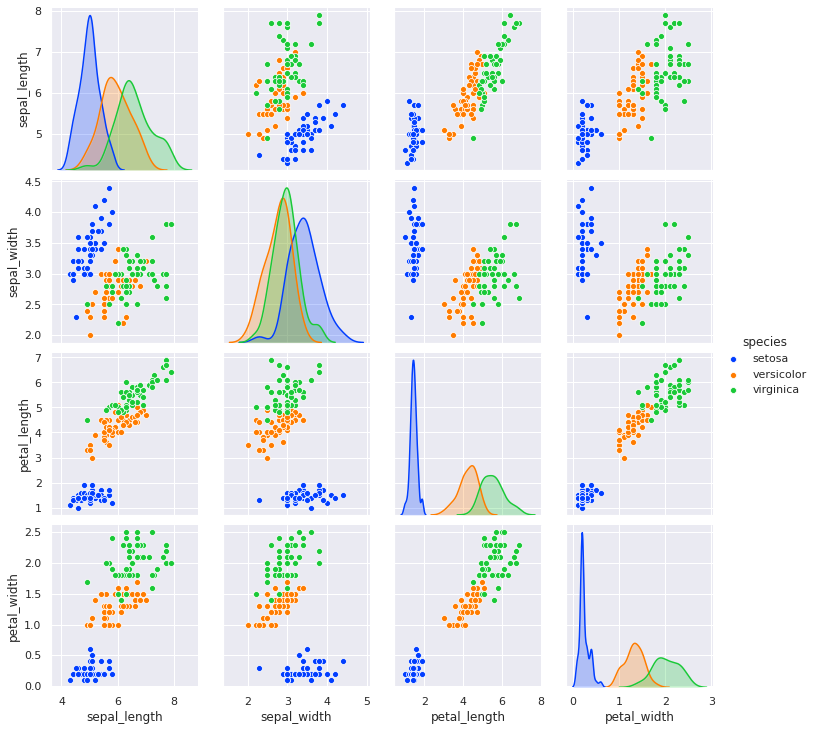

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', 
             diag_kind='kde', #hist kde
             palette="bright",
            #  corner=True,
             height=2.5);

#https://seaborn.pydata.org/tutorial/color_palettes.html

De acuerdo a las convencionalismos antes mencionados, para usar ``Scikit-Learn`` extraeremos la matriz de características y el arreglo de la variable de la variable dependiente. Usaremos las funciones de ``slicing`` para un ``DataFrame`` de Pandas:

In [ ]:
# X_iris = iris.drop('species', axis=1)
X_iris = iris.iloc[:,0:4]
print(X_iris.shape)
print(type(X_iris))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
y_iris = iris['species']
# y_iris = iris.iloc[:,-1]
# y_iris = iris.iloc[:,[4]]
y_iris.shape
# y_iris

(150,)

Visualmente, la estructura de las **características** y la **clase** son de la siguiente forma:

<img src="https://docs.google.com/uc?export=download&id=1jUPhzBX7oNzKY-ouhvj2Cw7kTq3170g0" width="600" align="middle">

---
## API de 'Estimators' de Scikit-Learn

### ``Estimator``

Una API (Application Program Interface), de forma simplista, especifica como los componentes de un lenguaje o software interactuan. El objeto principal de la API de Scikit Learn se denomina: "estimator". Este objeto **ajusta (fits) un modelo** a un **conjunto de entrenamiento** para **inferir/predecir** alguna propiedad de **nuevos datos**. Este modelo puede ser de **clasificación o regresión**. 

Esto significa que todos los algoritmos de ML son "estimators" con funciones en común. Por ejemplo, la función particular ``fit`` i.e. construir la relación $\mathbf{y}=f_z(X,\mathbf{\theta})$

        Estimator.fit(X,y)

donde $z$ es un algoritmo dado.

### Principios de la API

En general, esta API esta diseñada bajo los siguientes principios: 

- *Consistencia*: Todos los objetos comparten un conjunto limitado de métodos,  documentados de forma consistente.

- *Inspección*: Todos los parámetros especificados son atributos públicos. 

- *Jerarquía Limitada de los Objetos*: Los algoritmos son representados como clases de Python; los datos son representados como arreglos de NumPy , ``DataFrame``s de Pandas o matrices esparzas de SciPy; y los nombres de los parámetros son strings.

- *Composición*: Muchos algoritmos de ML pueden ser expresados como secuencias de algoritmos más fundamentales. Los algoritmos de Scikit Learn usan este principio siempre que sea posible.

- *Valores Sensibles por Defecto*: Para los modelos que requieren que el usuario especifique parámetros, la libreria cuenta con por defecto validos.

Es necesario "internalizar" estos principios de diseño para poder implementar nuevos algoritmos sobre diseños existentes. De manera más formal, estos y algunos principios otros se pueden consultar en el artículo [Scikit-Learn API](http://arxiv.org/abs/1309.0238).

### Pipeline Clásico usando Scikit-Learn

Un "pipeline" en Ciencia de Datos es **una secuencia de pasos de procesamiento y modelado aplicados a datos para un propósito específico**. Son útiles en proyectos de producción, para ahorrar tiempo de diseño y codificación.

El pipeline clásico para usar el ``Estimator`` de Scikit-Learn, ya sea para clasificación o regresión, es de la siguiente forma:

1. Elegir la clase apropiada de ``estimator`` e importarla de Scikit-Learn.
2. Elegir los parámetros del modelo ``instanciando`` la clase del estimador con los valores deseados.
3. Ordenar los datos en la matriz de características y el arreglo de la variable dependiente (como se describio anteriormente).
4. Ajustar/Entrenar el modelo llamando el método ``fit(X,y)`` de la instancia del modelo.
5. Aplicar el modelo a nuevos datos:
   - Para Aprendizaje Supervisado, se predicen las clases usando el método ``predict(X1)``.
   - Para Aprendizaje No Supervisado, se infieren propiedades (e.g. grupos de pertenencia) usando los métodos ``transform(X1)`` o ``predict(X1)``.

Los algoritmos que veremos en este módulo utilizan este esquema aunque existen sus variaciones (e.g. selección de variables).

---
# 2.2. Regresión Lineal (RL): Simple y Múltiple

La **RL** es el modelo más simple para entender los problemas de regresión:

$$y=f(\mathbf{x},\mathbf{\theta})\\
\mathbf{x}\in\mathbb{R}^N,\ \mathbf{\theta}\in\mathbb{R}^P ,\ y\in\mathbb{R}$$

Este tipo de modelos son **MUY POPULARES** debido a que:

  - Son *baratos* y *rápidos* de estimar, i.e. $\mathbf{\hat{\theta}^*}$
  - Son **INTERPRETABLES** 

como lo veremos en otra sección llamada "**Exploración de Datos**", el caso base de una RL consiste en ajustar una linea a un conjunto de puntos (1 variable independiente, 1 variable dependiente). Este modelo se puede extender a comportamientos más complicados (más dimensiones o relaciones no lineales).

Como en la mayoria de los notebooks de este curso, estaremos utilizando las siguientes librerias:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

plt.style.use('fivethirtyeight');

---
## RL Simple (RLS)

Una Regresión Lineal Simple, es una linea en 2D que es **ajustada** a datos y tiene la siguiente forma:

\begin{equation}
y=\beta_0+\beta_1x_1,
\end{equation}

tal que $y$ y $\mathbf{x}$ son las variable dependiente e independiente, respectivamente. Esta función también se suele escribir en términos del **valor esperado** de $Y$, es decir

\begin{align}
E(Y\mid X=x)&=\beta_0+\beta_1 x \\
\end{align}

Tal que $\beta_0$ es la *ordenada al origen* (*intercepto*, el valor de $(Y\mid X=0)$) y $\beta_1$ es la *pendiente* de la linea (la proporción de cambio en $(Y\mid X= x)$ por cada unidad en $x$). 

## RL Múltiple (RLM)

Para dos ó más variables independientes, el modelo se denominá RLM y se define

\begin{align}
y&=\beta_0+\beta_1x_1+\beta_2x_2+\ldots+\beta_nx_n \\
E(Y\mid X_1=x_1, X_2=x_2,\ldots)&=\beta_0+\beta_1x_1+\beta_2x_2+\ldots+\beta_nx_n \\
\end{align}

En ambos casos, modificando los valores de $\vec{\beta}$ podemos obtener cualquier hiperplano (linea en 2D, plano en 3D, hiperplano en ND), entonces, el objetivo en RL es encontrar ${\vec{\beta}}^*$ tal que tienen el **ajuste óptimo** a los datos. 

Cabe mencionar, que los parámetros **REALES** del modelo ( $\vec{\beta}^*$ ) son desconocidos, por lo tanto, los parámetros que obtenemos son **ESTIMADOS** ($\hat{\vec{\beta}^*}$).

---
## Mínimos Cuadrados Ordinario (OLS)

### Residuos y la Suma de sus Cuadrados
Para ejemplificar, volvamos a una variable independiente. El **ajuste óptimo** se puede determinar de varias formas, pero la manera más común (y la utilizada por `Scikit-Learn`) es mediante el **método de OLS**, el cual minimiza una cantidad denominada *suma de cuadrados de los residuos* (RSS):

\begin{align}
Minimizar\ RSS(\hat{\beta_0},\hat{\beta_1}) &= \sum_{i=1}^n [y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)]^2,\\
\end{align}

en esta ecuación el **residuo** corresponde al valor $e_i$, tal que $e_i=y_i - (\hat{\beta_0}+\hat{\beta_1} x_i)$. Geométricamente, un residuo es la distancia vertical entre la **linea ajustada** y el valor real $y_i$.

<img src="https://docs.google.com/uc?export=download&id=13gFpVnLx56mrQ1j4pGuZFlfXVl-EkoJK" width="600" align="middle">

Otra precisión importante, es que OLS produce estimados de los parámetros, es decir que se obtienen $\hat{\beta_0}$ y $\hat{\beta_1}$, y no los verdaderos $\beta_0$ y $\beta_1$.

### Representación Algebraica

Un modelo de regresión lineal para una sola variable independiente, lo podemos escribir como un sistema de ecuaciones lineales utilizando matrices de la siguiente forma:

$$
\begin{bmatrix}
y_1 \\ y_2 \\ \dots \\ y_n 
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
1 & \dots \\
1 & x_{n} 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\dots \\
\hat{\beta}_n 
\end{bmatrix}
+
\begin{bmatrix}
e_0 \\
e_1 \\
\dots \\
e_n 
\end{bmatrix}
=
X\hat{\beta}+\mathbf{e}
$$

### Geométricamente...

Como ya lo dijimos, buscamos minimizar la distancia entre la $\mathbf{y}$ y nuestra estimación $X\hat{\beta}$. Sin embargo, $\mathbf{y}=X\hat{\beta}$ solo es posible en raras ocasiones y lo que usualmente podemos lograr es $\mathbf{y}\approx X\hat{\beta}$. Esto significa que $X\hat{\beta}$ yace en el **espacio de características** mientras que $\mathbf{y}$ no, por lo tanto, existe una diferencia (vector de residuos $\mathbf{e}$). La siguiente figura ejemplifica esta relación para 2 variables independientes:

<img src="https://docs.google.com/uc?export=download&id=1y3sInYKdSv5uFEvk-f01S-omV-T9JBTV" width="600" align="middle">

### Estimación de las $\hat{\beta}$s

En este sentido, para estimar las $\hat{\beta}$s sus valores deben ser tales que el vector $\mathbf{e}=\mathbf{y}-X\hat{\beta}$ sea **perpendicular** (ortogonal en N dimensiones) al espacio de caracteristicas de $X$ (colX). 

Dado que dos vectores $u$ y $v$, son ortogonales si $\mathbf{u}^T\mathbf{v}=u_1v_1+u_2v_2+\ldots+u_nv_n=0$. Entonces, $\mathbf{e}$ es ortogonal a $X$ si $\mathbf{e}$ es ortogonal a cada columna de $X$. Esto es

\begin{align}
(\mathbf{y}-X\hat{\beta})^T X=0,\\
\mathbf{e}^T X=0
\end{align}

Aplicando **mágia algebraica** (multiplicaciones e inversiones de una matriz), podemos encontrar que

\begin{align}
X^T (\mathbf{y}-X\hat{\beta}) &=0 \Leftrightarrow \\
X^T\mathbf{y} - X^TX\hat{\beta} &= 0 \Leftrightarrow \\
X^T\mathbf{y} &= X^TX\hat{\beta}  \Leftrightarrow \\
(X^T X)^{-1} X^T\mathbf{y} &= \hat{\beta} \\
\end{align}

<!-- $$
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
1 & \dots  & \dots  & \dots  & \dots & \dots  \\
1 & x_{n1} & x_{n2} & x_{n3} & \dots & x_{nn} 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ \beta_2 \\ \dots \\ \beta_n 
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \dots \\ y_n
\end{bmatrix}
$$ -->

---
#### Por Ejemplo: 1 Dimensión
#### Datos sintéticos que provienen de una linea con $\beta_0=2$ y $\beta_1=5$:

2.236957254148928 4.936985017531059


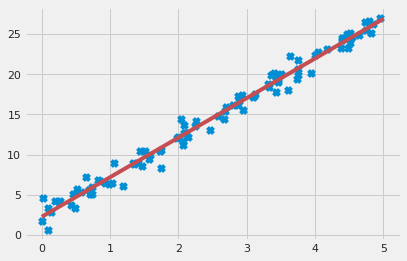

In [ ]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
tmp_sz = 100

b0 = 2
b1 = 5

x = 5 * rng.rand(tmp_sz)
y = (b0 + (b1 * x)) + rng.randn(tmp_sz)#Distribución Normal
X = np.asarray([np.ones(tmp_sz), x]).T

#\print(X)
# print(X.T)

# ``@`` means matrix multiplication
# https://numpy.org/devdocs/user/numpy-for-matlab-users.html
beta_0, beta_1 = inv(X.T @ X) @ X.T @ y
#                np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))

x_lin_space = np.linspace(0, 5, 100)

y_hat = beta_0 + beta_1 * x_lin_space
print(beta_0, beta_1)
plt.scatter(x, y, marker='x')
plt.plot(x_lin_space, y_hat, color='r');

---
## Suposiciones del Modelo

La LR tiene varias suposiciones: 

  - **Linealidad**: la relación entre X y $E[\cdot]$ de Y es lineal.
  - **Variables Independientes Estandarizadas**: $x'=\frac{(x - \bar{x})}{\sigma}$
  - **Homocedasticidad**: la varianza del residuo es positiva y la misma para cualquier valor de X. 
  \begin{align}
  Var(Y\mid X=x)&=\gamma^2 \\
  \gamma^2&>0
  \end{align}
  - **Independencia**: las observaciones son independientes entre sí.
    - **Sin co-linealidad** 
  - **Normalidad**: los residuos, $e_i$ se distribuye normalmente.
  $$e_i \sim \mathcal{N}(\mu,\,\sigma^{2})$$

<img src="https://docs.google.com/uc?export=download&id=1mG2E5pTy-5KpyBZtX2DftwYcLbKBNLn1" width="600" align="middle">


-0.34860229927285785
9.400248021793379


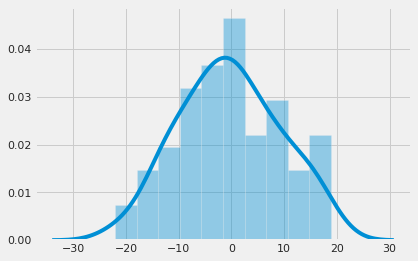

In [ ]:
residuals = y-y_hat

sns.distplot(residuals, bins = 10,kde=True,);
print(np.mean(residuals))
print(np.std(residuals))

## Ejercicio: 
### ¿Qué pasa si el ruido que contamina la serie de tiempo NO ES normal?

1. Realice las regresiones y grafíquelas en un grid de 2x2

2. Grafique los histogramas de los residuos en un grid de 2x2

Considere que los siguientes datos sintéticos provienen de una linea con $\beta_0=2$ y $\beta_1=5$. Los cuatro conjuntos de datos son contaminados por diferentes fuentes de ruido:

- Distribución Beta $P(x:\alpha,\beta) = \frac{\Gamma(\alpha +\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 -x)^{\beta - 1}$

- Distribución uniforme $P(x:a,b)=\frac{1}{b-a}\mid a\geq x\geq b$

- Distribución Logarítmica $P(x: p,k\geq1)=\frac{-1}{ln(1-p)}\frac{p^k}{k}$

- Distribución Log-Normal $P(x: \mu,\sigma) = \frac{1}{x}\cdot \frac{1}{\sigma \sqrt{2\pi}} exp(\frac{(ln(x)-\mu)^2}{2\sigma^2})$

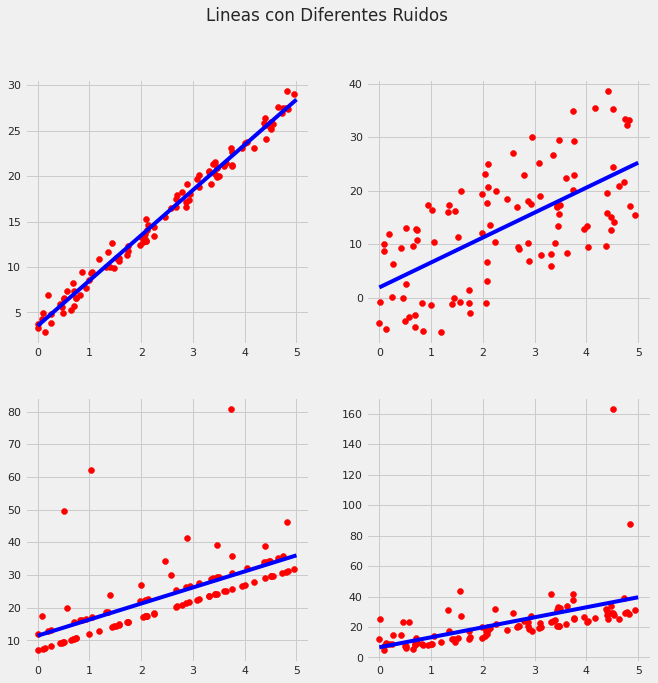

In [ ]:
rng = np.random.RandomState(1)
tmp_sz = 100

b0 = 2
b1 = 5
scl= 5

x = scl * rng.rand(tmp_sz)
y_beta = (b0 + (b1 * x)) + rng.beta(a=2,b=5, size=tmp_sz)*scl#Distribución Beta
y_unif = (b0 + (b1 * x)) + rng.uniform(low=-3, high = 3, size = tmp_sz)*scl#Distribución uniforme
y_logs = (b0 + (b1 * x)) + rng.logseries(p=.66, size = tmp_sz)*scl #Distribución logaritmica
y_lognorm = (b0 + (b1 * x)) + rng.lognormal(size=tmp_sz)*scl #Distribución log-nor

### HERE your CODe
X = np.asarray([np.ones(tmp_sz), x]).T

#Note: A @ B - matrix product
beta_0b, beta_1b = inv(X.T @ X) @ X.T @ y_beta
beta_0u, beta_1u = inv(X.T @ X) @ X.T @ y_unif
beta_0ls, beta_1ls = inv(X.T @ X) @ X.T @ y_logs
beta_0ln, beta_1ln = inv(X.T @ X) @ X.T @ y_lognorm

x_lin_space = np.linspace(0, scl, 100)
y_hat_b = beta_0b + beta_1b * x_lin_space
y_hat_u = beta_0u + beta_1u * x_lin_space
y_hat_ls = beta_0ls + beta_1ls * x_lin_space
y_hat_ln = beta_0ln + beta_1ln * x_lin_space

fig, axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Lineas con Diferentes Ruidos')
axs[0,0].scatter(x, y_beta, color='red');
axs[0,0].plot(x_lin_space, y_hat_b, color='blue');

axs[0,1].scatter(x, y_unif, color='red');
axs[0,1].plot(x_lin_space, y_hat_u, color='blue');

axs[1,0].scatter(x, y_logs,color='red');
axs[1,0].plot(x_lin_space, y_hat_ls, color='blue');

axs[1,1].scatter(x, y_lognorm, color='red');
axs[1,1].plot(x_lin_space, y_hat_ln, color='blue');

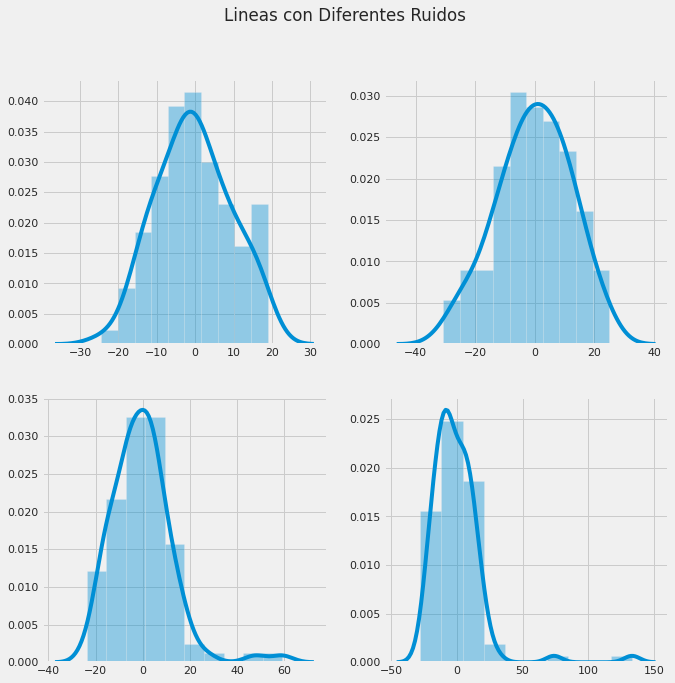

In [ ]:
#HEre YoUR coDE
residuals_b = y_beta-y_hat_b
residuals_u = y_unif-y_hat_u
residuals_ls = y_logs-y_hat_ls
residuals_ln = y_lognorm-y_hat_ln

fig, axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Lineas con Diferentes Ruidos')

sns.distplot(residuals_b, bins = 10,kde=True,ax=axs[0,0]);
sns.distplot(residuals_u, bins = 10,kde=True,ax=axs[0,1]);
sns.distplot(residuals_ls, bins = 10,kde=True,ax=axs[1,0]);
sns.distplot(residuals_ln, bins = 10,kde=True,ax=axs[1,1]);

---
## Regresión usando Scikit Learn

Ahora construiremos una regresión lineal usando el estimador de Scikit-Learn llamado ``LinearRegression``. Usemos los datos ``y_beta``:

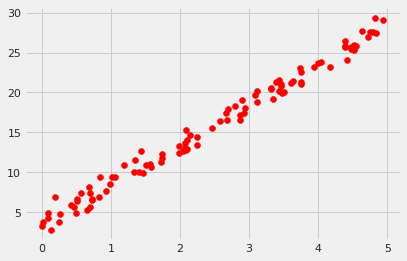

In [ ]:
y = y_beta
plt.scatter(x, y, color='red');

#### 1. Elegir la CLASE del estimador: ``LinearRegression``.


In [ ]:
from sklearn.linear_model import LinearRegression

#### 2. Elegír los parámetros del modelo

Vale la pena destacar que no es lo mismo la  **CLASE** del modelo que una **INSTANCIA** de un modelo.

Una vez que hayamos seleccionado la clase del modelo, todavía hay algunas opciones disponibles para nosotros. Dependiendo de la clase del modelo con la que estamos trabajando, es posible que necesitemos responder una o más preguntas como las siguientes:

- ¿Nos gustaría considerar dentro del ajuste la intersección con el eje y?
- ¿Nos gustaría que el modelo sea normalizado?
- ¿Nos gustaría preprocesar y seleccionar nuestras variables para mejorar la precisión/estabilidad del modelo?
- ¿Qué grado de regularización nos gustaría usar en nuestro modelo?
- ¿Cuántos componentes del modelo nos gustaría usar?

Estos son ejemplos de las elecciones que deben hacerse una vez que se selecciona la clase del modelo. Estas se representan como parámetros que se establecen antes de que el modelo se ajuste a los datos. En ``Scikit-Learn``, los parámetros se eligen pasando valores a la instancia del modelo.

Para nuestro ejemplo de regresión lineal, podemos crear una instancia de la clase ``LinearRegression`` y especificar que nos gustaría ajustar la intersección utilizando el parámetro ``fit_intercept``:

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Tenga en cuenta que cuando se instancia el modelo, lo único que hemos hecho es almacenar estos valores como parámetros. Es decir, que todavía no hemos aplicado el modelo a ningún dato: la API ``Scikit-Learn`` deja muy clara la distinción entre la **elección** del modelo y la **aplicación** del modelo a los datos.

#### 3. Organice los datos en una matriz de características ($X$) y un vector objetivo ($Y$)

Organice los datos en una matriz de características bidimensionales y una matriz para la variable objetivo unidimensional.

La variable objetivo ``y`` ya está en la forma correcta (un arreglo de longitud ``n_samples``), pero necesitamos manipular los datos `` x`` para convertirla en una matriz de tamaño ``[n_samples , n_features] ``.
En este caso, queremos asegurarnos que nuestro vector sea un vector columna. Esto equivale a una simple remodelación de la matriz unidimensional:

In [ ]:
#Np.newaxis comes in very handy when you want to explicitly convert 
#an 1D array to either a row vector or a column vector.
X = x[:, np.newaxis] #None tambien puede ser...
X.shape

(100, 1)

#### 4. Ajuste el modelo a sus datos

Ahora es el momento de aplicar nuestro modelo a los datos.
Esto se puede hacer con el método ``fit()`` del modelo:

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

La función ``fit()`` hace que se lleven a cabo una serie de cálculos internos dependientes del modelo, y los resultados de estos cálculos se almacenan en atributos específicos del modelo que el usuario puede explorar.

En Scikit-Learn, por convención, todos los parámetros del modelo que se aprendieron durante el proceso ``fit()`` son nombrados con guiones bajos al final; Por ejemplo, en este modelo lineal, tenemos lo siguiente:

In [ ]:
model.coef_

array([4.9834583])

In [ ]:
model.intercept_

3.5246063738214257

Estos dos parámetros representan $\beta_0$ y $\beta_1$.
En comparación con los resultados por OLS, vemos que el valor obtenido para $\hat{\beta}_1$ es muy similar, aunque para $\hat{\beta}_0$ hay una mayor diferencia.

Una pregunta que surge con frecuencia se refiere a la incertidumbre acerca de los parámetros del modelo, ya que estos también son variables aleatorias.

En general, Scikit-Learn no proporciona herramientas para obtener conclusiones acerca de los parámetros internos del modelo: la interpretación de los parámetros del modelo es mucho más una *pregunta de modelado estadístico* que una pregunta de *aprendizaje automático*. El aprendizaje automático se centra más la *predicción*.

No obstante, si se desea profundizar en el significado de los parámetros del modelo, hay herramientas como las incluidas en el [paquete de Statsmodels de Python](http://statsmodels.sourceforge.net/).

In [ ]:
import statsmodels.api as sm

#Con Intercepto---
# import pandas as pd
# X1 = sm.add_constant(X)
# print(pd.DataFrame(X1).head)
#---

#Sin Intercepto
results = sm.OLS(y, X).fit()

#Con Intercepto---
# results = sm.OLS(y, X1).fit()
#---
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              7225.
Date:                Thu, 03 Sep 2020   Prob (F-statistic):                    2.42e-94
Time:                        21:52:19   Log-Likelihood:                         -211.70
No. Observations:                 100   AIC:                                      425.4
Df Residuals:                      99   BIC:                                      428.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 5. Predecir nuevas observaciones

Una vez que se entrena el modelo, estos son aplicados para predecir nuevas observaciones, siempre que las nuevas observaciones provengan del mismo universo del cual proviene la muestra de entrenamiento.

En Scikit-Learn, esto se puede hacer usando el método ``predict()``.
Para ejemplificar, nuestros "nuevos datos" serán un rango de valores *x*, y preguntaremos qué valores *y* predice el modelo:

In [ ]:
xfit = np.linspace(-1, 6)

Como en el caso anterior, coercionamos la estructura de **X** para que sea
una matriz de tamaño ``[n_samples, n_features]``, la cual podremos alimentar al modelo para predecir:

In [ ]:
X = xfit[:, np.newaxis]
y_hat = model.predict(X)

Por último, visualicemos los resultados de los datos de entrenamiento (en rojo) vs los datos del modelo (en azul). Observe que se predicen los valores de $y$ para los intervalos $x\in[-1,0]$ y $x\in[5,6]$, los cuales no estan contenidos en el conjunto de entrenamiento.

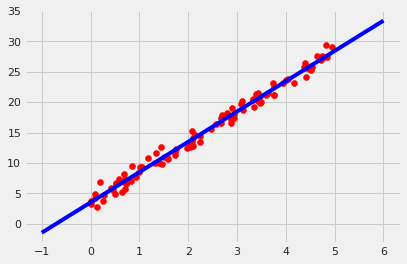

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(X, y_hat, color='blue');

De la misma forma podemos hacer una RLM


$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
donde $\mathbf{x}$ es el vector de características.

Sin embargo, dado que los humanos solo podemos percibir visualmente 3 dimensiones, es difícil visualizar una RLM. Lo que si podemos observar, son los ajustes de los coeficientes para cada variable. 

Utilizando multiplicaciones de matrices con NumPy podemos construir un modelo sintético:

0.50000000000001
[ 1.5 -2.   1. ]


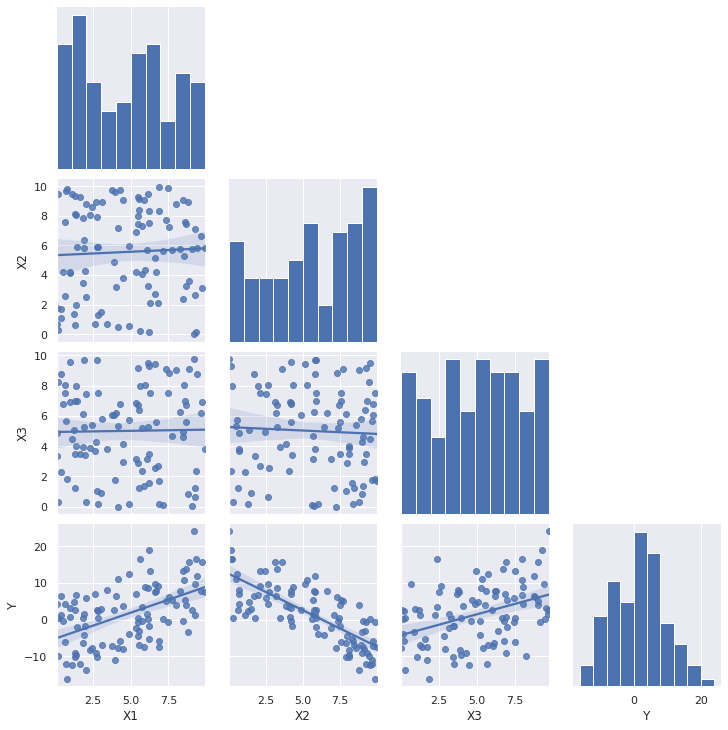

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
# print(X.shape)

#                   B1,   B2,  B3
y = 0.5 + np.dot(X, [1.5, -2., 1.])
# print(y.shape)

Y= y[:, np.newaxis]
XY = np.concatenate((X,Y),axis=1)
XY_df = pd.DataFrame(XY, columns=['X1','X2','X3','Y'])
sns.pairplot(XY_df, 
             kind='reg', 
             corner = True);

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

# results = smf.OLS(y, X).fit()
# print(results.summary())

---
# 2.2. Regresión No-Lineal con Funciones Base

Tal pareciera que la RL esta limitada **ESTRÍCTAMENTE** a modelar relaciones lineales... PUES NO ES CIERTO, ya que podemos relajar esta condición. 

Para utilizar RL cuando existen relaciones no-lineales entre las variables, podemos **transformar** las características a través de **funciones base**. La idea es tomar nuestra RLM:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots,
$$

y **construir** las variables $x_1, x_2, x_3,\ etc.$ Esto es, reemplazamos las variables tal que $x_n = f_n(x)$, donde $f_n()$ es una función que transforma nuestros datos.

Por ejemplo, si la función base es $f_n(x) = x^n$, nuestro modelo se transforma en una regresión polinomial de la siguiente forma:

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

Cabe destacar, que este modelo sigue siendo un **modelo LINEAL**. Ya que, por lineal nos referimos al hecho de que los coeficientes $a_{1,\ldots,n}$ nunca se multiplican o dividen entre sí. De esta forma la RL se convierte en una polinomial sin cambiar el modelo. *Grosso modo* al hacer esta transformación proyectamos los valores de cada variable $x$ en un espacio de mayor dimensionalidad, tal que una regresión lineal pueda ser ajustada cuando la relación entre  $x$ y $y$ es más compleja.

---
### Funciones Base Polinomiales

Este tipo de proyecciones polinomiales se pueden utilizar a través de Scikit-Learn con el transformador ``PolynomialFeatures``:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, include_bias=False)

x = np.array([2, 3, 4])
poly.fit_transform(x[:, np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Podemos observar que el arreglo ``x`` ha pasado de ser de un arreglo de 1D a un arreglo de 3D, al elevar cada valor por un exponente de acuerdo a su posición.

Esto nos permite representar la misma información en un espacio de mayor dimensionalidad, en el cual presumiblemente existe un hiperplano el cual podemos obtener mediante una regresión lineal.

La forma más *límpia* para lograr esto es a través de un ``pipeline`` de Scikit-Learn. Por ejemplo, construyamos variables de modelo polinomial de orden 7 sobre las cuales realizaremos una regresión lineal:

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Utilizando esta transformación en conjunto con una regresión lineal, podemos ajustarnos a un conjunto de datos con una relación mucho más compleja entre $x$ y $y$. Por ejemplo, una onda senoidal con ruido:

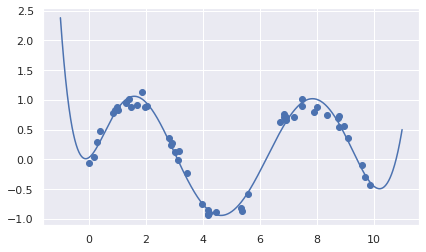

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)

# print(poly_model.steps)
# print(poly_model.named_steps['linearregression'].coef_)
# print(poly_model.named_steps['linearregression'].intercept_)

xfit = np.linspace(-1, 11, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Empleando funciones base polinomiales de 7mo orden, el ajuste obtenido por la función al conjunto de datos es muy buena, ¿o no?

---
## Pipelines de Scikit Learn

Para simplificar el encadenamiento de procesos, scikit learn provee de una clase conocida como ``pipeline``. Este objeto permite encadenar varios procesos como por ejemplo: 

imputar valores faltantes ``->`` crear variables polinomiales ``->`` hacer una RL

En el caso de la regresión polinomial, el **modelo** llamado ``poly_model`` el cual es de tipo ``pipeline``, crea variables polinomiales para posteriormente hace una RL:


In [ ]:
rfrom sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())

Este pipeline es independiente de los datos

---
# 2.3. Selección de variables: Correlación y Mapas de Calor

Las funciones base le dan mayor flexibilidad a nuestra regresión lineal, sin embargo, se corre el riesgo de **SOBRE-ENTRENAR** el modelo.
Esto también se conoce como el **Dilema de Sesgo y Varianza**.

<img src="https://docs.google.com/uc?export=download&id=1-PZqi_sJAGFffWnIXimESJ6C0e-sdzkl" width="800" align="middle">

Por ejemplo, si elegimos demasiadas funciones de base polinomiales para realizar una regresión polinomial sobre datos provenientes de una función seno, terminaremos con resultados totalmente errones; lo mismo sucederá si utilizamos demasido pocas:

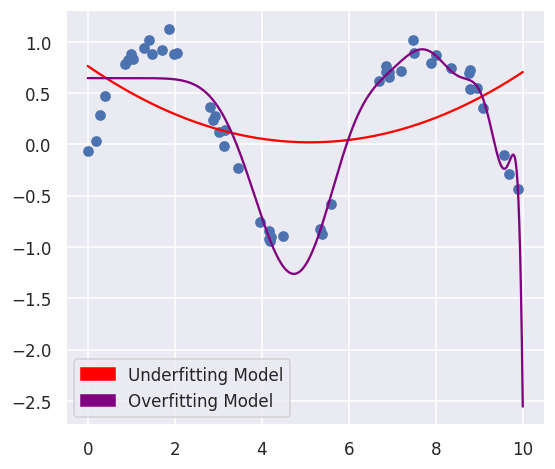

In [ ]:
import matplotlib.patches as mpatches
from sklearn.pipeline import make_pipeline

poly_modelUF = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
poly_modelOF = make_pipeline(PolynomialFeatures(20),
                           LinearRegression())

rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_modelUF.fit(x[:, np.newaxis], y)
poly_modelOF.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfitUF = poly_modelUF.predict(xfit[:, np.newaxis])
yfitOF = poly_modelOF.predict(xfit[:, np.newaxis])

plt.figure(figsize=(5, 5), dpi=110)
plt.scatter(x, y)
plt.plot(xfit, yfitUF, color='red');
plt.plot(xfit, yfitOF, color='purple');

red_patch = mpatches.Patch(color='red', label='Underfitting Model')
prlp_patch = mpatches.Patch(color='purple', label='Overfitting Model')
plt.legend(handles=[red_patch,prlp_patch])


Con los datos proyectados a un espacio de 20 dimensiones, el modelo tiene demasiada flexibilidad y llega a valores extremos; el modelo cuadrático también se comporta erroneamente al asumir que los datos se pueden ajustar a una parábola.


---
### Ejemplo:

[Predicción de generación de energía eléctrica máxima de una planta de energía de ciclo combinado](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#).

La operación esta influenciada por 4 variables ($\mathbf{X}$): 
- Temperatura ambiente (T), $T\in{\{1.81, 37.11\}}°C$
- Presión atmosférica (AP), $AP\in{\{992.89, 1033.30\}}$ milibares
- Humedad Relativa (RH), $RH\in{\{25.56,100.16\}}$%
- Exhaust Vacuum (V), $V\in{\{25.36,81.56\}}$ cm Hg

La variable a predecir ($y$) es:
- Generación Neta Horaria ($P_E$), $P_E\in{\{420.26,495.76\}}$ MW


<img src="https://docs.google.com/uc?export=download&id=1qYSC7XNF01U06QJIu6otCrVGiLds5Eyc" width="800" align="middle">

In [70]:
import pandas as pd
#from google.colab import data_table

url = 'https://raw.githubusercontent.com/MauricioRR-Tec/Machine-Learning/master/Notebooks/Module_2/Datasets/Folds5x2_pp.csv'
ccpp_df = pd.read_csv(url)
ccpp_df
#data_table.DataTable(ccpp_df, include_index=True, num_rows_per_page=10)
#data_table.DataTable? #How to display help regarding a function

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


---
### Interpretación de los Coeficientes en un RL

Los valores de los coeficientes de un modelo de RL en conjunto con el uso de pruebas de hipótesis pueden ser utilizados para indicar la **naturaleza entre las variables independientes y la variable dependiente** y si estas relaciones son **estadísticamente significativas**.

Respecto a **los coeficientes** el **signo** y la **magnitud** indican diferentes cosas:

- ***Signo***: el sentido de la correlación entre cada variable independiente y la variable dependiente. Un coeficiente *positivo* indica que a medida que aumenta el valor de $x_i$, la media de $y$ también tiende a aumentar; un coeficiente *negativo* sugiere que a medida que aumenta el valor de $x_i$, el valor de $y$ tiende a disminuir.

- ***Magnitud***: indica cuánto cambia la media de $y$ dado un cambio de una unidad en la variable independiente $x_i$ mientras el resto de las variables se mantienen constantes. Esta propiedad de mantener constantes las otras variables es crucial ya que permite evaluar el efecto de cada variable de forma aislada sobre $y$.

Por otro lado existen dos pruebas de hipótesis utilizadas en RL. Por un lado, la **prueba F de Fisher** es utilizada para verificar la significancia de las variables independientes en una RL evaluandolas simultáneamente. Por el otro lado, la **prueba T** es utilizada para verificar la significancia una variable a la vez.

La prueba F de Fisher tiene las siguientes dos hipótesis:

- $H_0$: el modelo con solo el intercepto tiene el mismo ajuste a los datos que el modelo propuesto con todas las variables independientes.

- $H_A$: el modelo propuesto ajusta mejor que el modelo con solo el intercepto.

Si el p-value resultante de la prueba F es menor o igual que el nivel de significancia (e.g. $\textit{p}=0.005$), podemos aceptar $H_A$.

La prueba T es similar pero evaluando una variable independiente a la vez.

Analicemos el ejemplo utilizando ``statsmodels.api``

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm

std_scl = StandardScaler()

X_ccpp = ccpp_df.iloc[:,0:4]
y_ccpp = ccpp_df['PE']

X_train, X_test, y_train, y_test = train_test_split(X_ccpp, y_ccpp, 
                                                    test_size=0.33, 
                                                    random_state=100)

X_train_scl = std_scl.fit_transform(X_train) #Standardize and assign it to a variable
X_train_sm = sm.add_constant(X_train_scl)
model_sm = sm.OLS(y_train, X_train_sm)

results = model_sm.fit()
results.params

print(results.summary(xname=['Intercept','AT','V','AP','RH']))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.105e+04
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:39:14   Log-Likelihood:                -18813.
No. Observations:                6410   AIC:                         3.764e+04
Df Residuals:                    6405   BIC:                         3.767e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.3426      0.057   7984.902      0.0

---
## Visualizando la relación  variables usando un Mapa de Calor

La **correlación** es cualquier relación estadística, ya sea causal o no, entre dos o más variables aleatorias que mide como se relacionan unas con las otras. En el sentido más amplio se reriere a cualquier asociación estadística, aunque comúnmente nos refierimos **al grado en que un par de variables están relacionadas linealmente** ($r\text{ o } \rho$).

Las correlaciones son útiles porque pueden indicar una **relación predictiva** que puede explotarse en la práctica. Usando este tipo de funciones podemos formar una **heuristica** para seleccionar las variables que utilizaremos en nuestra RL. Por ejemplo, una compañía eléctrica puede producir menos energía en un día templado en función de la correlación entre la demanda de electricidad y el clima.

Las 2 funciones de correlación más utilizadas son:

- **Coeficiente de Pearson**. Intenta establecer una línea con el mejor ajuste para los datos de dos variables a traves de los valores esperados. El valor del coeficiente resultante indica qué tan lejos está el conjunto de datos real de los valores esperados.
\begin{align}
\rho_{X,Y} &= corr(X,Y)= \frac{cov(X,Y)}{\sigma_X\cdot\sigma_Y}=\frac{\text{E}[(X - \mu_X) \cdot (Y - \mu_y)]}{\sigma_X\cdot\sigma_Y} \\
corr(X,Y) &\in [-1,1]
\end{align}


<img src="https://docs.google.com/uc?export=download&id=111DG1bi5ewOtSIuOlB0pRcFj21yeFG5x" width="800" align="middle">


- **Coeficiente de Spearman**. Es una medida no-paramétrica de correlación de rango (dependencia estadística entre los rangos de dos variables). Evalúa qué tan bien la relación entre dos variables se puede describir utilizando una función monotónica, sea creciente o decreciente (indistintamente si esta función es lineal o no). Los valores que toma este coeficiente se interpretan de forma similar al coeficiente de Pearson.

\begin{align}
\rho_{rg_X,rg_Y} &= r_s(rg_X,rg_Y)=\frac{cov(rg_X,rg_Y)}{\sigma_{rg_X}\cdot\sigma_{rg_Y}}, \\
r_s &\in [-1,1]
\end{align}

tal que $rg_{X_i},\ rg_{Y_i}$ representan los valores de las variables $X_i$ y $Y_i$, respectivamente, en rangos.

<img src="https://docs.google.com/uc?export=download&id=1WXANQb-rIdPO0bISEOCsBGf1OLfIZRvt" width="800" align="middle">




#### Ejemplo:

Usemos estas 2 medidas construiremos una matriz de correlaciones.
Para esto necesitaremos las librerias Seaborn, Matplotlib, Sklearn, Pandas y Numpy.

1. Analizaremos cuales son las correlaciones observadas y sus signos.
2. Utilizaremos un umbral de correlación para determinar las variables independientes que entrarán en nuestro modelo final.

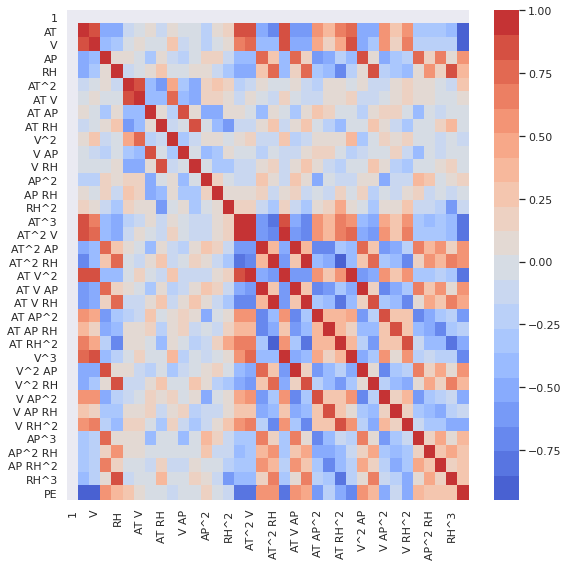

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

std_scl = StandardScaler()
poly = PolynomialFeatures(3)

X_ccpp = ccpp_df.iloc[:,0:4]
y_ccpp = ccpp_df['PE']

X_train, X_test, y_train, y_test = train_test_split(X_ccpp, y_ccpp, 
                                                    test_size=0.2, 
                                                    random_state=1)

#Standardize X_train into X_train_scl
X_train_scl = std_scl.fit_transform(X_train) #Standardize and assign it to a variable

#Construct a DataFrame with column names
X_train_scl_df = pd.DataFrame(X_train_scl, 
                              index=X_train.index, 
                              columns=X_train.columns)

#Create PolynomialFeatures -> get their names
p_model     = poly.fit(X_train_scl_df)
poly_names  = p_model.get_feature_names(X_train_scl_df.columns)

#Transform X_train_scl into X_train_poly where polynomial features are stored
X_train_poly    = poly.fit_transform(X_train_scl_df)
X_train_poly_df = pd.DataFrame(X_train_poly, 
                              index=X_train.index, 
                              columns= poly_names)

#Create the full Train_df which is the matrix composed by Xy
all_names = np.concatenate((X_train_poly_df.columns, 'PE'), axis=None)
Train_ndarray = np.hstack([X_train_poly_df, y_train[:, np.newaxis]])
Train_df = pd.DataFrame(Train_ndarray, 
                              index=X_train.index, 
                              columns = all_names)

# Compute the correlation matrix
corr_mtx = Train_df.corr()
# corr_mtx = Train_df.corr('spearman')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_mtx, dtype=np.bool))

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_mtx, 
            # mask=mask, 
            cmap=sns.color_palette("coolwarm", 20))
# sns.heatmap(corr_mtx,ax=ax, cmap ="YlGnBu", linewidths = 0.1,)



Usando la matriz de correlación determinaremos que variables usaremos para predecir ``PE``. En este caso, requeriremos que la relación sea $|r|> 0.5$

In [73]:
print(corr_mtx.iloc[1:35,-1].abs()>0.5)

AT           True
V            True
AP           True
RH          False
AT^2        False
AT V        False
AT AP       False
AT RH       False
V^2         False
V AP        False
V RH        False
AP^2        False
AP RH       False
RH^2        False
AT^3         True
AT^2 V       True
AT^2 AP      True
AT^2 RH      True
AT V^2       True
AT V AP      True
AT V RH      True
AT AP^2      True
AT AP RH    False
AT RH^2      True
V^3          True
V^2 AP       True
V^2 RH      False
V AP^2       True
V AP RH     False
V RH^2       True
AP^3        False
AP^2 RH     False
AP RH^2     False
RH^3        False
Name: PE, dtype: bool


--- 
## TAREA (1/2):

Para el ejemplo del Generador de Energía de Ciclo Combinado, predecir ``X_test`` con las variables seleccionadas de acuerdo al umbral especificado.

Medir el error utilizando las métricas de error $R^2$ y MSE. Imprima ambos.



In [74]:
vars = (corr_mtx.iloc[1:35,-1].abs()>0.5).to_frame()
vars['Var'] = vars.index
vars = vars[vars['PE']]
X_Train_df = Train_df[vars['Var']]

X_test_scl = std_scl.fit_transform(X_test)

X_test_scl_df = pd.DataFrame(X_test_scl, 
                              index=X_test.index, 
                              columns=X_test.columns)
X_test_poly    = poly.fit_transform(X_test_scl_df)
X_test_poly_df = pd.DataFrame(X_test_poly, 
                              index=X_test.index, 
                              columns= poly_names)

X_Test_df = X_test_poly_df[vars['Var']]

model = LinearRegression().fit(X_Train_df,y_train)
y_hat = model.predict(X_Test_df)
print('R2 = ',r2_score(y_test, y_hat))
print('MSE = ',mean_squared_error(y_test, y_hat, squared=False))


R2 =  0.9313286936928414
MSE =  4.480182823091144


---
# 2.4. Evaluación del Error: $R^2$ y Error Cuadrático Promedio (MSE).

- **Coeficiente de Determinación** ($R^2$ or $r^2$): Es la proporción de la varianza en la variable dependiente ($y$) que es predecible/que se puede explicar a partir de las variables independientes ($X$). 

  Hay varias definiciones del coeficiente de determinación. En el caso RLS, $r^2$ es simplemente el cuadrado del coeficiente de correlación i.e. $(\rho_{X,Y})^2$. En el caso de RLM se llama coeficiente de correlaciones multiples. En ambos casos su valor es $R^2\in[0,1]$.

  $$
  R^2 \equiv 1 - \frac{\sum_i e_i^2}{\sum_i (y_i-\bar{y})^2},
  $$

  tal que $e_i=y_i-\hat{y}_i$ son los residuos, y $\bar{y}$ es la media de la variable dependiente.

- **Error Cuadrático Promedio** (MSE): El error cuadrático promedio indica que tan cerca está una línea de regresión de un conjunto de puntos. Lo hace tomando los residuos y elevandolos al cuadrado. Se eleva al cuadrado por dos razones, por una parte es necesario para eliminar cualquier signo negativo, por la otra, le da más peso a las diferencias más grandes. En este sentido, MSE es una medida de la variabilidad explicada por el modelo. Esta medida toma valores entre $0\geq MSE \geq \infty$, de tal suerte que entre más pequeño sea el valor de MSE, mejor será el ajuste entre $y_i$ y $\hat{y}_i$.

  $$
  MSE(\mathbf{e})  = \frac{1}{N} \sum_{i=1}^N (e_i)^2.
  $$

  Sin embargo, para que el resultado de esta medida sea más intuitivo (el error en las mismas unidades que la variable dependiente), se utiliza la ráiz cuadrada de MSE (RMSE).

  $$
  RMSE(\mathbf{e})  = \sqrt{\frac{1}{N} \sum_{i=1}^N (e_i)^2},
  $$


### Ejercicio:

Deseamos construir una RL  con ``Scikit Learn`` para predecir la Energía Generada (PE) del ejemplo del generador de ciclo combinado. 

El modelo que deben utilizar debe incluir las siguientes caracteristicas:

1. $X$ tiene que estar estandarizado
2. Debemos usar funciones base para generar un polinómio de orden 5
3. El conjunto de datos se debe dividir en: ``X_train, y_train`` ($70 \%$) y ``X_test, y_test`` ($30 \%$).
4. Se debe predecir sobre ``X_test`` estandarizado.
5. Calcule el error de la RLM usando $R^2$ y RMSE. Imprima ambos.

Necesitaremos las librerias de ``sklearn``:

1. ``linear_model.LinearRegression``
2. ``preprocessing.StandardScaler, preprocessing.PolynomialFeatures``
3. ``model_selection.train_test_split``
4. ``metrics.r2_score, metrics.mean_squared_error``
5. ``pipeline import make_pipeline``

¿Qué podemos concluir de los resultados? 
¿Qué tan bueno es nuestro ajuste?

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

ccpp_df
scaler = StandardScaler()
X = ccpp_df.iloc[:,0:4]
y = ccpp_df['PE']
X_t, X_te, y_t, y_te = train_test_split(X,y, test_size = 0.3)
X_t = scaler.fit_transform(X_t)
X_te = scaler.fit_transform(X_te)
model = make_pipeline(PolynomialFeatures(5),LinearRegression())
model.fit(X_t, y_t)
y_h = model.predict(X_te)
print('R2 = ',r2_score(y_te, y_h))
print('MSE = ',mean_squared_error(y_te, y_h, squared = False),' MW')


R2 =  0.9454626247216754
MSE =  3.996123892160266  MW


--- 
## TAREA (2/2) EXTRA:

Con el fin de entender **un poquitín** mejor el estado de la pandemia por el COVID19 en México, realizaremos un pronóstico de los **nuevos casos por día** en la semana del **31 de Agosto al 4 de Septiembre** del 2020.

Asumiremos que ES POSIBLE predecir el comportamiento de los **nuevos casos por día** a partir del comportamiento de otros paises utilizando una regresión lineal. En este sentido, asumimos que:
1. el número de **nuevos casos por día** es un reflejo de las características de los los diferentes paises como las medidas tomadas respecto al distanciamiento social, distribución socioeconómica, conectividad con otros paises, tiempo del primer caso, condiciones ambientales, etc.
2. Es posible predecir los **nuevos casos por día** utilizando una RLM (al menos a corto plazo).

Para esto deberán utilizar los datos del [COVID19 (HAGA CLICK AQUÍ)](https://datahub.io/core/covid-19#data). Recuerde que esta BD requiere ser manipulada en dos pasos: 1) Pivotear la tabla para tener los casos acumulados de los países en cada columna y los renglones correspondan al registro, 2) Diferenciar los casos acumulados respecto al dia anterior, para tener los **nuevos casos por día** 

El modelo que deben utilizar debe incluir las siguientes caracteristicas:

1. $X$ tiene que estar estandarizado
2. Debemos usar funciones base para generar un polinómio de orden 5
3. Seleccione las 10 variables con mayor correlación.
4. Se debe predecir sobre ``X_test`` estandarizado.
5. Para predecir, solo puede usar la información disponible hasta el 25 de Abril.
6. Calcule el error de la RLM usando $R^2$ y RMSE. Imprima ambos.

In [117]:
import pandas as pd
import numpy as np
import datetime
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cov_df = (pd.read_csv(url).
          groupby('Country/Region').
          sum().
          diff(axis = 1))
cov_df = cov_df.drop(['Lat', 'Long'], axis = 1).T
cov_df.index = pd.to_datetime(cov_df.index)
cov_df = cov_df[cov_df.index>'2020-04-25'].dropna()
model = make_pipeline(PolynomialFeatures(5), LinearRegression())
x = cov_df.index.values
y1 = np.asarray(cov_df['Mexico'])
xfit = pd.date_range(start='2020-04-25',end="2020-08-30")
model.fit(x[:,np.newaxis], y1)
yhat1 = model.predict(xfit[:,np.newaxis])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


## No se que ocurre aqui, no se porque sale el modelo lineal

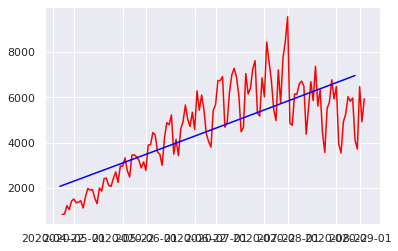

In [115]:
plt.plot(x, y1, color='red')
plt.plot(xfit, yhat1, color='blue');
